In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = '/Volumes/MyPassport/Hailey_data_preproc/fMRI_data/group_analyses/Masked_copes/L1stats_27Apr2022_noTempDerivs_motionRegressors_modelv3_passport.feat_All_zstat.txt'
with open(path) as file:
    rawdata = file.readlines()
         
# Get colnames
colnames = rawdata[0].split('\t ')
colnames[0] = colnames[0].strip(' ')
colnames[-1] = colnames[-1].strip('\n')

# Get data
df = []
for l in range(1,len(rawdata)):
    row = rawdata[l].split('\t')
    row[-1] = row[-1].strip('\n')
    row[1:] = [float(x) for x in row[1:]]
    df.append(row)
    
df=pd.DataFrame(df,columns=colnames)
df.head()

,subID,zstat1_Ce_amygdala,zstat2_Ce_amygdala,zstat3_Ce_amygdala,zstat4_Ce_amygdala,zstat5_Ce_amygdala,zstat6_Ce_amygdala,zstat7_Ce_amygdala,zstat8_Ce_amygdala,zstat9_Ce_amygdala,...,zstat14_ACC_cluster_cope7,zstat15_ACC_cluster_cope7,zstat16_ACC_cluster_cope7,zstat18_ACC_cluster_cope7,zstat19_ACC_cluster_cope7,zstat20_ACC_cluster_cope7,zstat21_ACC_cluster_cope7,zstat70_ACC_cluster_cope7,zstat73_ACC_cluster_cope7,zstat74_ACC_cluster_cope7
0,sub103,-0.6437,0.1940,0.0601,0.2629,0.5151,-0.5323,0.3303,0.0972,0.6426,...,-0.2040,-0.7242,1.3421,0.3860,0.3795,0.1274,-1.1247,1.1800,-1.2047,-1.2098
1,sub105,-0.4886,-0.0230,0.4353,-0.6510,0.4216,0.0296,0.2679,-0.2456,-1.0860,...,0.6208,-0.0401,1.9583,0.0649,0.1611,0.4138,-0.0810,-0.0151,-0.0866,0.3049
2,sub109,-0.1403,-0.0697,0.1166,-0.0947,-0.7396,0.1037,0.0272,0.2562,0.0845,...,-0.0200,0.4429,0.7295,-1.7454,1.2381,0.7004,-0.4784,-1.0488,0.2211,0.1270
3,sub111,-0.5999,0.3931,-0.1208,0.2892,-0.8665,-0.0020,-0.2588,-0.0008,1.7710,...,0.2602,0.2954,1.0300,-0.1122,0.4349,0.2986,-0.5535,0.0071,-0.8137,-0.6063
4,sub117,-0.9648,-0.1419,-0.2361,-0.0800,-1.6172,-0.3624,0.5193,-0.6611,-0.5843,...,0.6798,0.1576,1.3034,0.9177,0.0486,0.1970,-3.4702,0.7627,-0.6571,-0.4050


In [3]:
df.columns

Index(['subID', 'zstat1_Ce_amygdala', 'zstat2_Ce_amygdala',
       'zstat3_Ce_amygdala', 'zstat4_Ce_amygdala', 'zstat5_Ce_amygdala',
       'zstat6_Ce_amygdala', 'zstat7_Ce_amygdala', 'zstat8_Ce_amygdala',
       'zstat9_Ce_amygdala',
       ...
       'zstat14_ACC_cluster_cope7', 'zstat15_ACC_cluster_cope7',
       'zstat16_ACC_cluster_cope7', 'zstat18_ACC_cluster_cope7',
       'zstat19_ACC_cluster_cope7', 'zstat20_ACC_cluster_cope7',
       'zstat21_ACC_cluster_cope7', 'zstat70_ACC_cluster_cope7',
       'zstat73_ACC_cluster_cope7', 'zstat74_ACC_cluster_cope7'],
      dtype='object', length=199)

In [ ]:
# # Remove ROIs if necessary
# remove = 'L_aRCZ'
# keep_cols = [x for x in df.columns if remove not in x]
# df = df.loc[:,keep_cols].copy()

# remove = 'inf_colliculus'
# keep_cols = [x for x in df.columns if remove not in x]
# df = df.loc[:,keep_cols].copy()

# df.columns

In [4]:
def plotBetaWeights(df, contrast_number, title):
    con = ''.join(['zstat',str(contrast_number),'_'])
    cols_to_plot = [x for x in df.columns if con in x]
    plot_df = []
    for c in cols_to_plot:
        for r in range(len(df)):
            plot_df.append([df.loc[r,'subID'], df.loc[r,c], c[7:]])

    plot_df = pd.DataFrame(plot_df,columns=['subID','value','ROI'])

    ax = sns.barplot(
        x="ROI", 
        y="value", 
        data=plot_df, 
        ci=68, edgecolor="black", errcolor="black", errwidth=1.5, capsize = 0.1, alpha=0.5
    )
    sns.stripplot(
        x="ROI", 
        y="value", 
        data=plot_df, dodge=True, alpha=0.6, ax=ax
    )
    ax.set_title(title, fontsize = fontsize, pad=15)
    ax.set_xlabel('ROI', fontsize = fontsize)
    ax.set_ylabel('Parameter estimate', fontsize = fontsize)
    sns.set(rc = {'figure.figsize':(figsize[0],figsize[1])})
    ax.set_xticklabels(ROI_names, fontsize=fontsize,rotation = 45)
#     ax.set_yticks([-1, 0, 1, 2, 3])
    ax.set_yticks([-2, -1, 0, 1, 2])
    ax.set_yticklabels(ax.get_yticks(), size=fontsize)
#     ax.set_ylim(-1, 3)
    ax.set_ylim(-2,2)

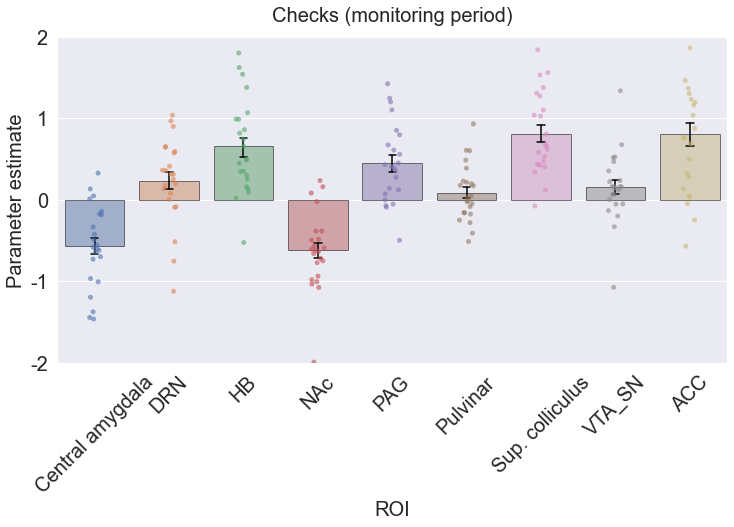

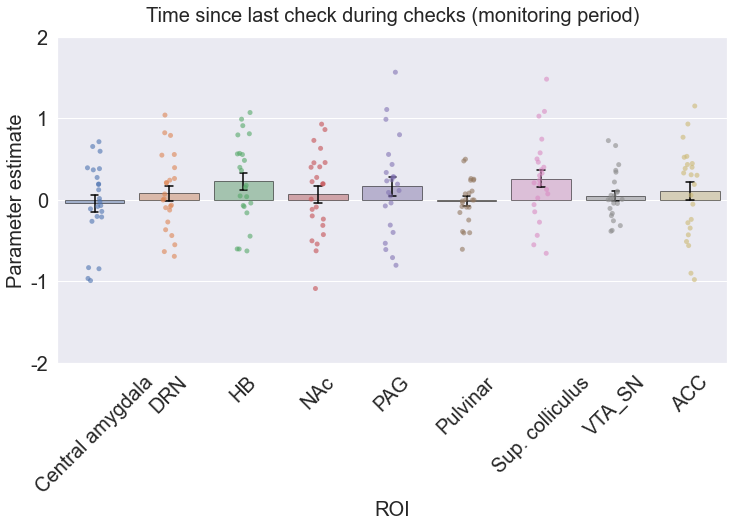

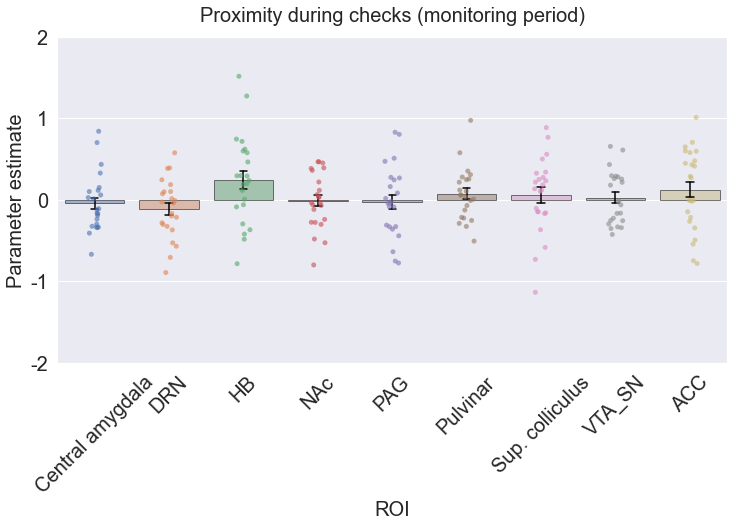

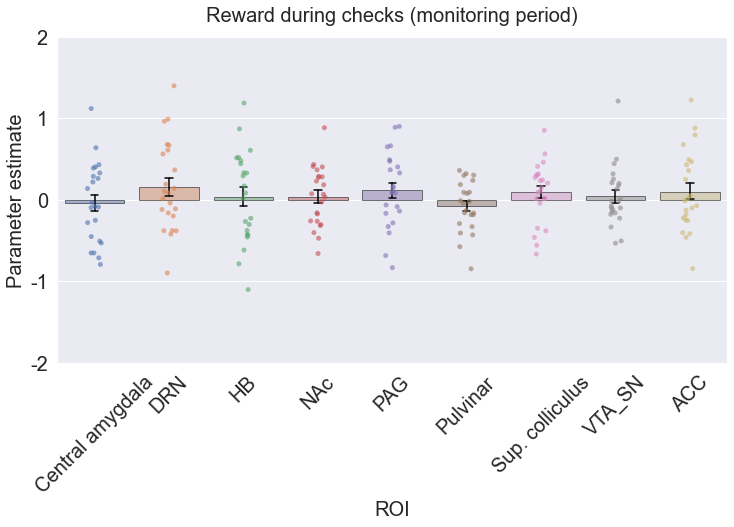

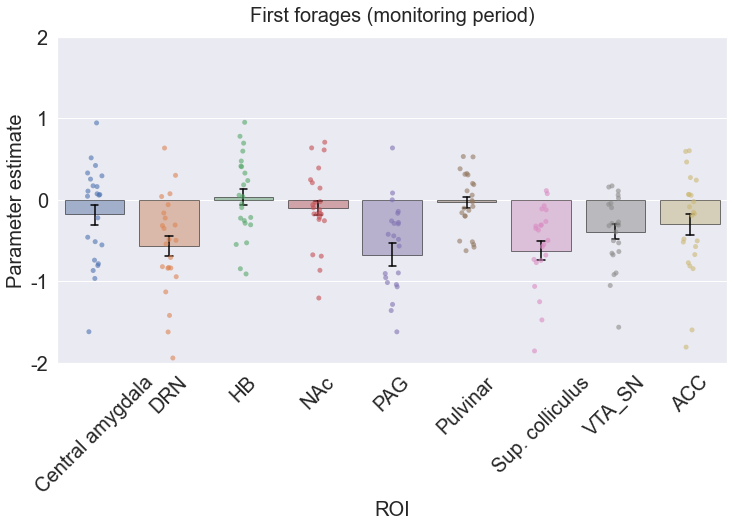

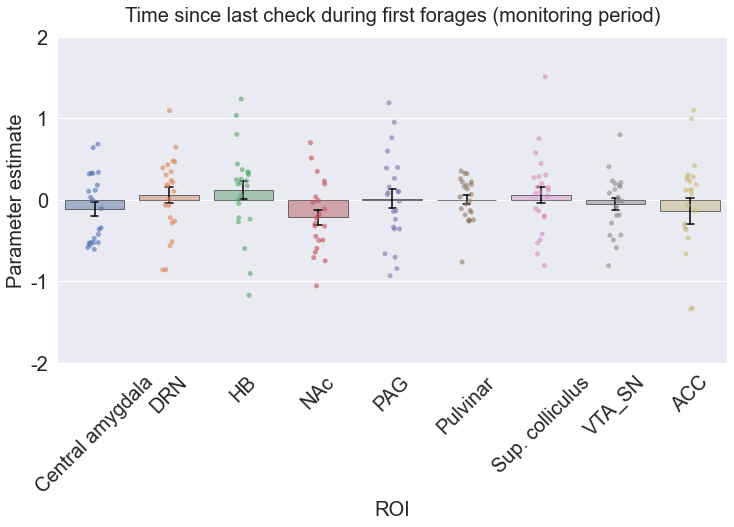

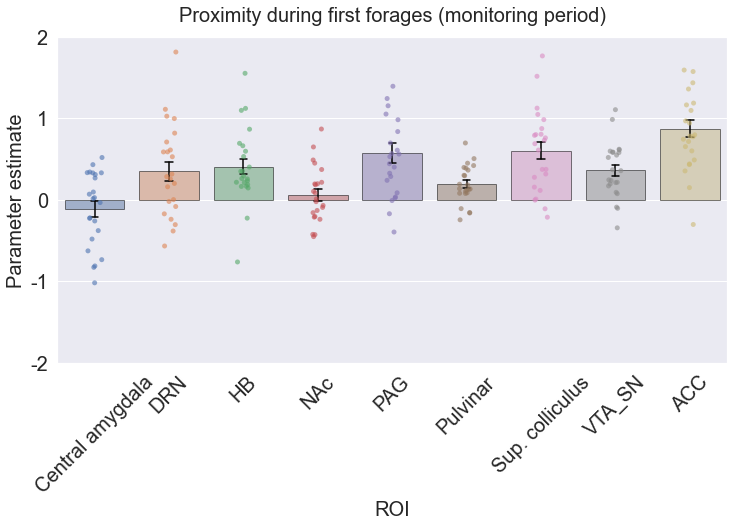

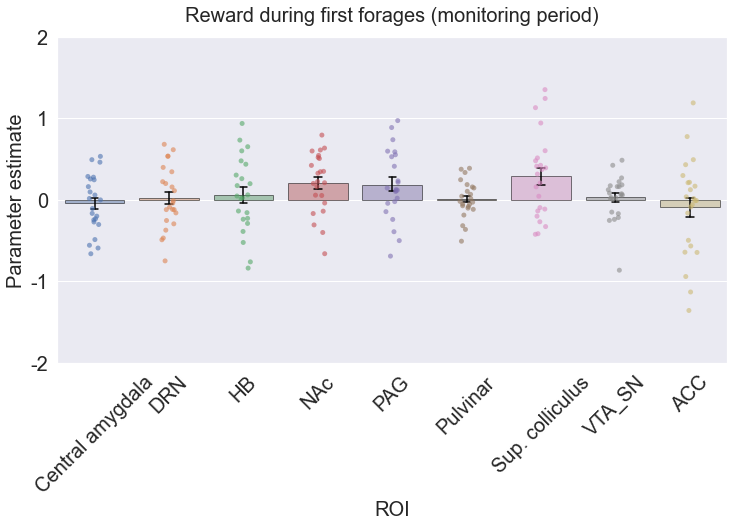

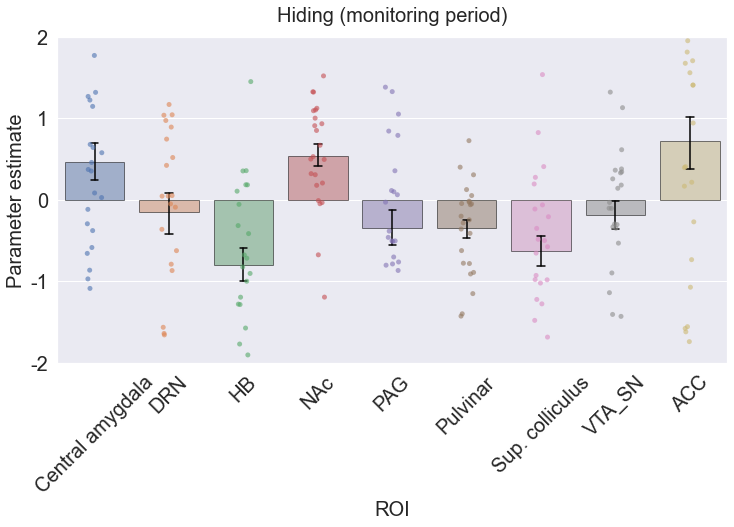

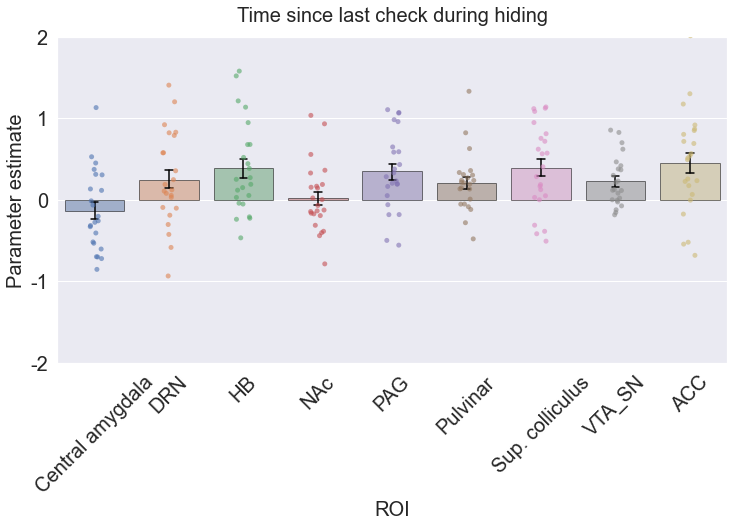

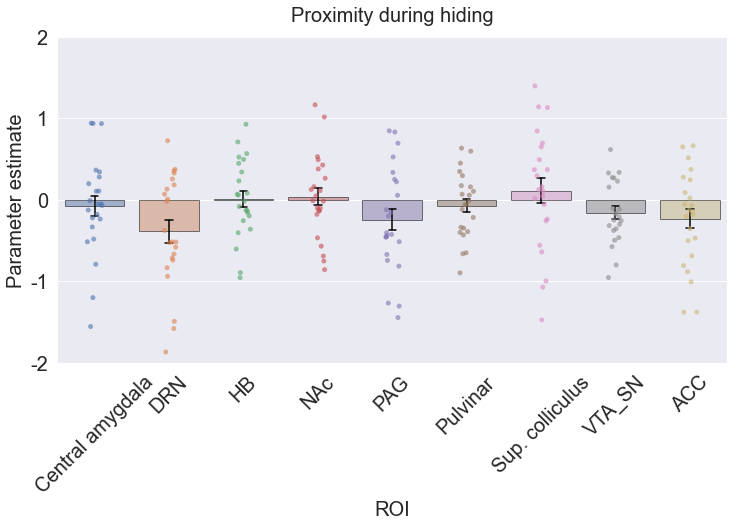

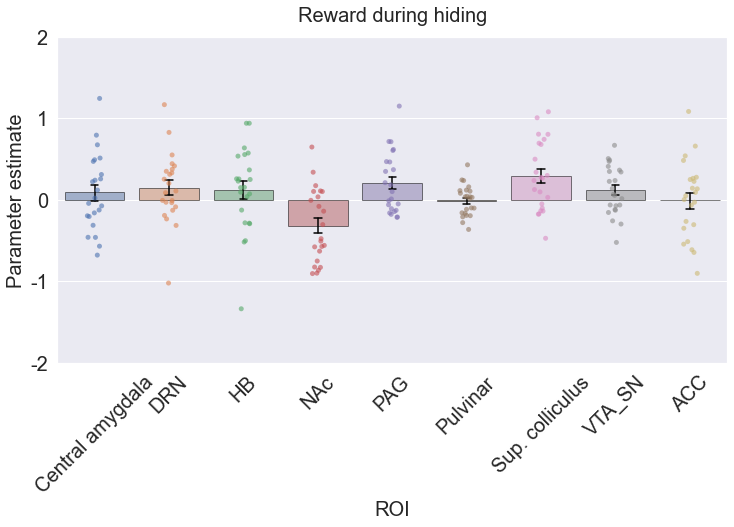

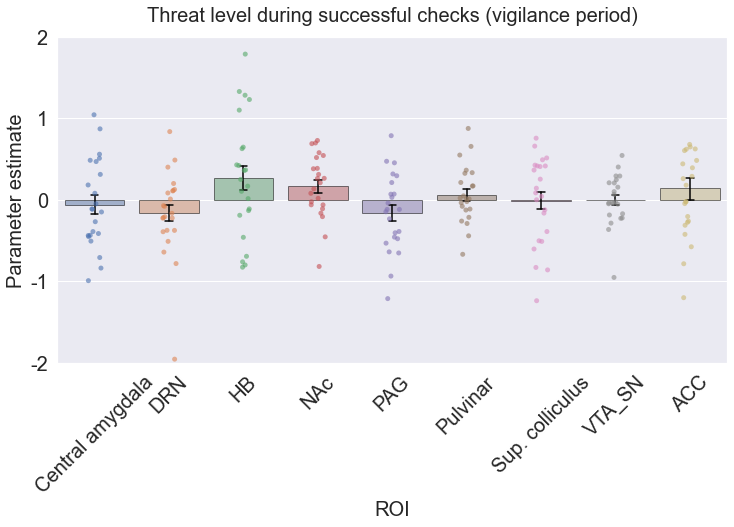

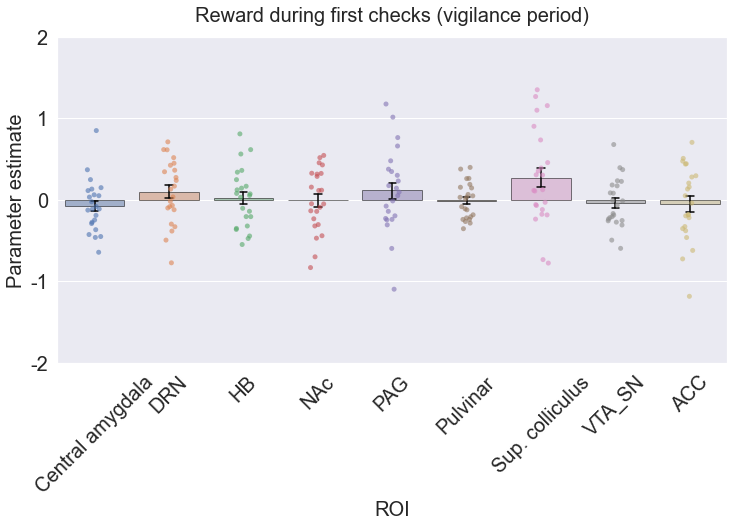

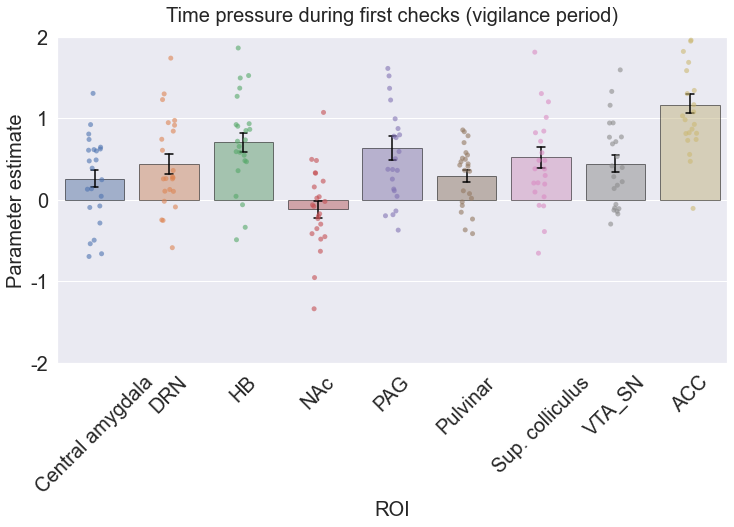

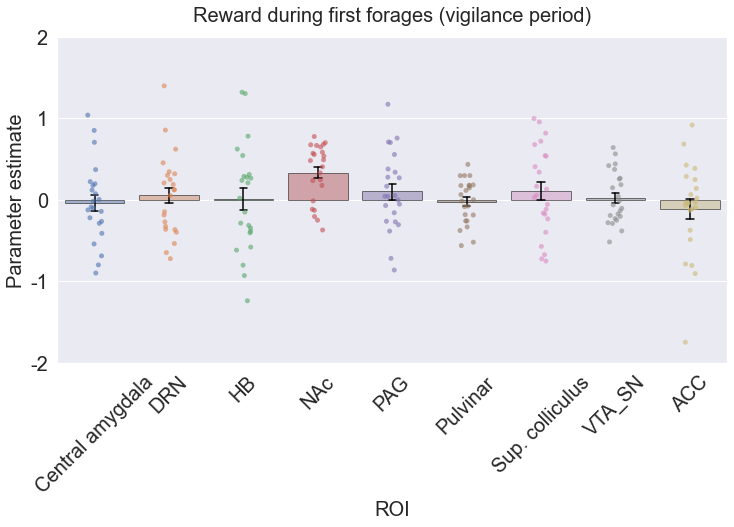

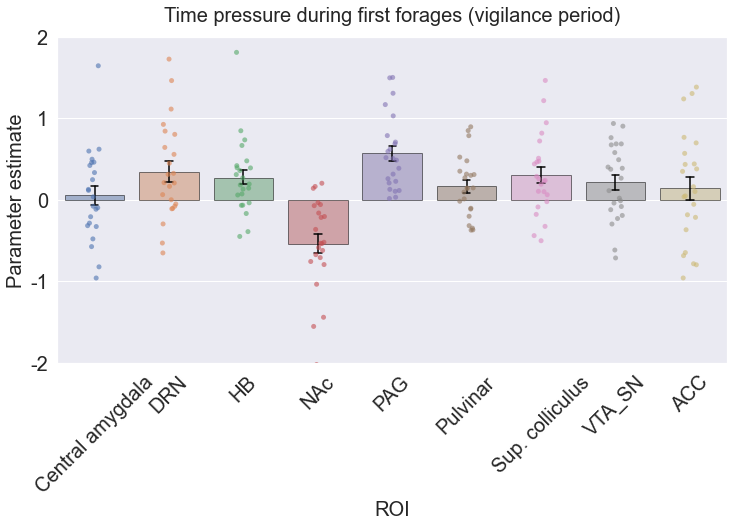

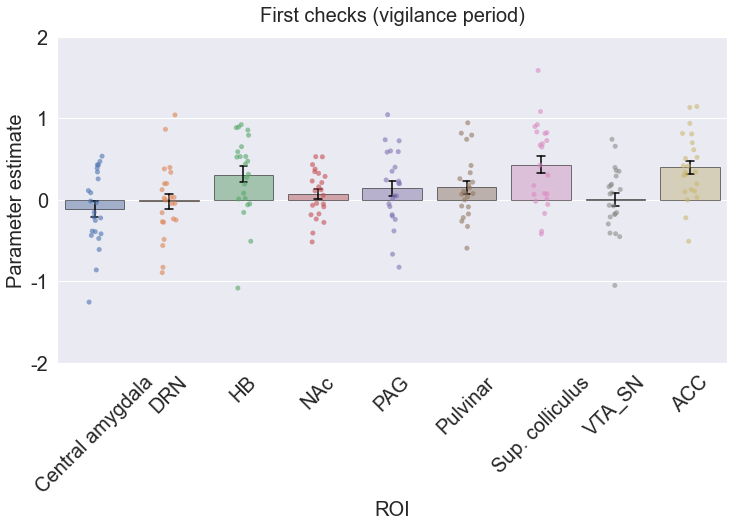

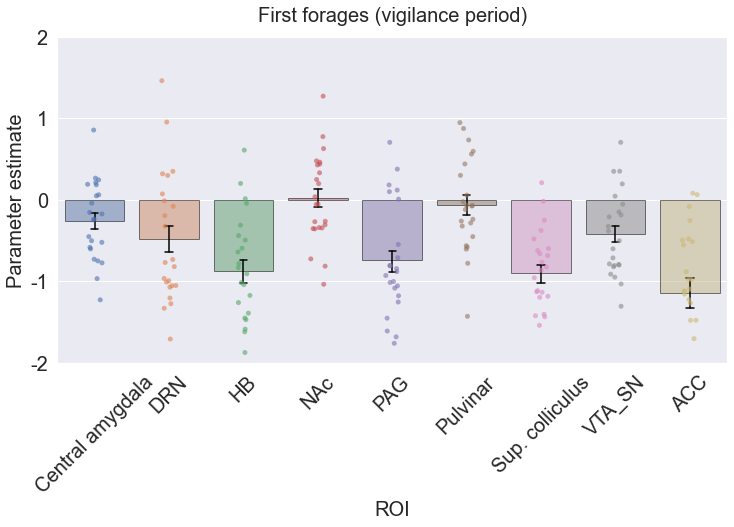

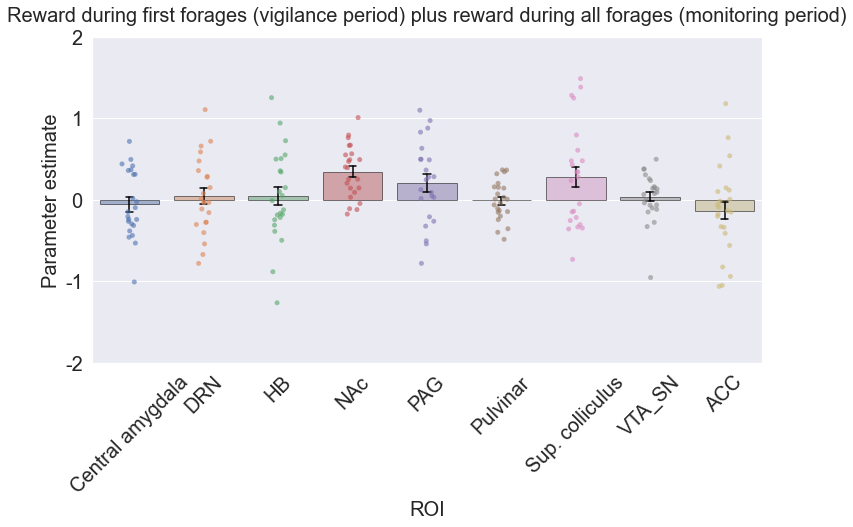

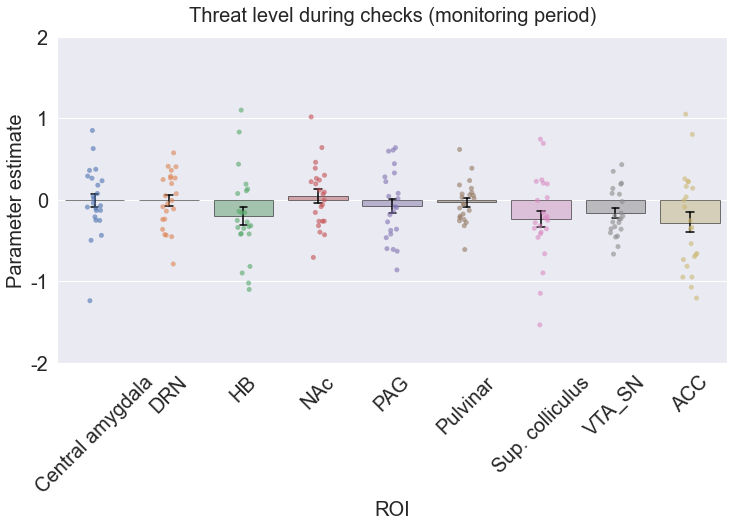

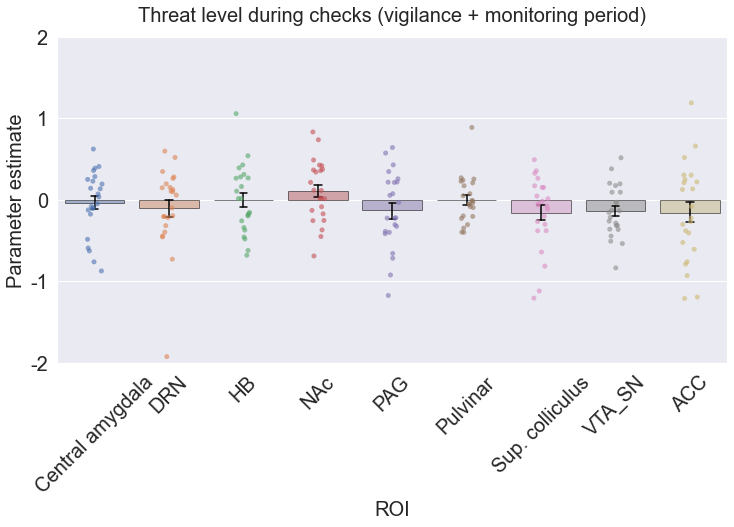

In [6]:
figsize = [12, 6]
fontsize = 20
ROI_names = ['Central amygdala','DRN','HB','NAc','PAG','Pulvinar','Sup. colliculus','VTA_SN','ACC']

contrast_num = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 18, 19, 20, 21, 70, 73, 74]
contrast_names = [
    'Checks (monitoring period)',#1
    'Time since last check during checks (monitoring period)',#2
    'Proximity during checks (monitoring period)',#3
    'Reward during checks (monitoring period)',#4
    'First forages (monitoring period)', #5
    'Time since last check during first forages (monitoring period)', #6
    'Proximity during first forages (monitoring period)',#7
    'Reward during first forages (monitoring period)', #8
    'Hiding (monitoring period)',#9
    'Time since last check during hiding',#10
    'Proximity during hiding',#11
    'Reward during hiding',#12
    'Threat level during successful checks (vigilance period)',#14
    'Reward during first checks (vigilance period)',#15
    'Time pressure during first checks (vigilance period)',#16
    'Reward during first forages (vigilance period)',#18
    'Time pressure during first forages (vigilance period)',#19
    'First checks (vigilance period)',#20
    'First forages (vigilance period)',#21
    'Reward during first forages (vigilance period) plus reward during all forages (monitoring period)',#70
    'Threat level during checks (monitoring period)',#73
    'Threat level during checks (vigilance + monitoring period)'#74
]

for cn in range(len(contrast_num)):
    plotBetaWeights(df, contrast_num[cn], contrast_names[cn])
    outPDF = '/Volumes/MyPassport/Hailey_data_preproc/fMRI_data/group_analyses/Masked_copes/L1stats_27Apr2022_noTempDerivs_motionRegressors_modelv3_passport_figs/contrast_{}.pdf'.format(contrast_num[cn])
    plt.savefig(outPDF, dpi=300)
    plt.show()

In [ ]:
# Unused - special condition only

# #plotBetaWeights(df, 9, 'Hiding, monitoring period')
# contrast_number = 9
# title = 'Hiding (monitoring period)'
# con = ''.join(['zstat',str(contrast_number),'_'])
# cols_to_plot = [x for x in df.columns if con in x]
# plot_df = []
# for c in cols_to_plot:
#     for r in range(len(df)):
#         plot_df.append([df.loc[r,'subID'], df.loc[r,c], c[7:]])

# plot_df = pd.DataFrame(plot_df,columns=['subID','value','ROI'])

# ax = sns.barplot(
#     x="ROI", 
#     y="value", 
#     data=plot_df, 
#     ci=68, edgecolor="black", errcolor="black", errwidth=1.5, capsize = 0.1, alpha=0.5
# )
# sns.stripplot(
#     x="ROI", 
#     y="value", 
#     data=plot_df, dodge=True, alpha=0.6, ax=ax
# )
# ax.set_title(title, fontsize = fontsize, pad=20)
# ax.set_xlabel('ROI', fontsize = fontsize)
# ax.set_ylabel('Parameter estimate', fontsize = fontsize)
# sns.set(rc = {'figure.figsize':(figsize[0],figsize[1])})
# ax.set_xticklabels(ROI_names, fontsize=fontsize,rotation = 30)
# #ax.set_yticks(ax.get_yticks().tolist())
# ax.set_yticks([-3, -2, -1, 0, 1])
# ax.set_yticklabels(ax.get_yticks(), size=fontsize)
# ax.set_ylim(-3, 1)